# Dataset Statistics - CRANE

Provide stats for WOS publications, WOS keywords, NSF awards, NSF keywords

- keywords are normalized via OpenRefine
    - Key Collision Fingerprint and ngram methods 
    - Following clusters identified and merged:
        - 1,739 clusters for AI
        - 2,333 clusters for IoT
        - 3,201 clusters for robotics
- NSF keywords are excluded for < 1998 (325 records excluded)
- Some Active 1998-2017 NSF awards started < 1998
  - These awards are counted for annual totals and awards totals
  - These awards are excluded for counting keywords and authors
    - AI: 96 records (<1998)
    - Robotics: 229 records (<1998)
    - IoT: No records (<1998)
- IoT data is filtered manually to iliminate false positives
  - IoT has 503 records that required manual revision.
  - Out of 503 we have 371 unique keywords
  - 64 keywords were removed (e.g. antibiotic) as irrelevant to IoT
- NSF Fundings
    - AI Funding Amount:  494,310,951.0
    - Robotics Funding Amount:  1,375,299,908.0
    - IoT Funding Amount:  149,498,845.0

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib_venn import venn3, venn3_circles, venn2, venn2_circles

### WOS Publications

In [32]:
# using txt to avoid excel errors with counting unique long digit ids - it skips some zeros
iot = pd.read_csv('0212wos_clarivate_iot.txt', encoding='latin1', sep=",")
rob = pd.read_csv('0212wos_clarivate_robotics.txt', encoding='latin1', sep=",")
ai = pd.read_csv('0212wos_clarivate_ai.txt', encoding='latin1', sep=",")
allpubs = pd.read_csv('0212wos_clarivate_all.txt', encoding='latin1', sep=",")

#### Total Publications 1998-2017

In [50]:
print("AI unique publications:", ai['ISI_LOC'].nunique())
print("Robotics unique publications:",rob['ISI_LOC'].nunique())
print("IoT unique publications:", iot['ISI_LOC'].nunique())
print("Total unique publications for all three terms", allpubs['ISI_LOC'].nunique())
print("Total Non-Unique Publications for all three terms:", ai['ISI_LOC'].count() + 
      rob['ISI_LOC'].count()+ 
      iot['ISI_LOC'].count())

AI unique publications: 7414
Robotics unique publications: 13931
IoT unique publications: 11371
Total unique publications for all three terms 32425
Total Non-Unique Publications for all three terms: 32716


#### Overlapping Publications 1998-2017

In [4]:
ai['ISI_LOC'] = ai['ISI_LOC'].astype(str)
rob['ISI_LOC'] = rob['ISI_LOC'].astype(str)
iot['ISI_LOC'] = iot['ISI_LOC'].astype(str)

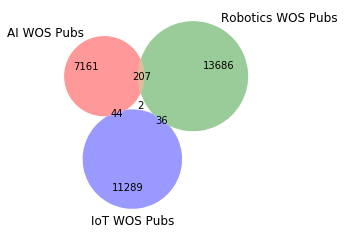

In [7]:
set1 = set(ai.ISI_LOC)
set2 = set(rob.ISI_LOC)
set3 = set(iot.ISI_LOC)
s = (set1,set2,set3)
v = venn3(subsets=s, set_labels = ('AI WOS Pubs', 'Robotics WOS Pubs', 'IoT WOS Pubs'))
#plt.savefig('Venn-Clarivate-1998-2017.png')
#plt.savefig('Venn-Clarivate-1998-2017.svg')
plt.show()

In [8]:
print("Summary for WOS Publications")
print("Intersect between AI and Robotics:", len(set1.intersection(set2))) # AI + ROB
print("Intersect between Robotics and IoT:", len(set2.intersection(set3))) # ROB + IOT
print("Intersect between AI and IoT:",len(set1.intersection(set3))) # AI + IOT)
print("Intersect between all three:",len(set1.intersection(set3,set2))) # all three

Summary for WOS Publications
Intersect between AI and Robotics: 209
Intersect between Robotics and IoT: 38
Intersect between AI and IoT: 46
Intesect between all three: 2


### WOS Keywords

In [11]:
iotwos = pd.read_csv('iot_wos_keywords_normalized.csv', encoding='latin1', sep=",")
robwos = pd.read_csv('robotics_wos_keywords_normalized.csv', encoding='latin1', sep=",")
aiwos = pd.read_csv('ai_wos_keywords_normalized.csv', encoding='latin1', sep=",")

In [12]:
len(aiwos), len(robwos), len(iotwos) # double-checking the count of records

(7414, 13931, 11371)

In [13]:
aikeyswos = aiwos['Keywords'].values
robkeyswos = robwos['KEYWORDS'].values
iotkeyswos = iotwos['KEYWORDS'].values

In [52]:
# Creating sets of unique keywords
aisetwos = set()
for i in range(len(aikeyswos)):
    line = aikeyswos[i]
    split = line.split(";")
    for x in range(len(split)):
        a = split[x]
        aisetwos.add(a.lower())
robsetwos = set()
for i in range(len(robkeyswos)):
    line = robkeyswos[i]
    split = line.split(";")
    for x in range(len(split)):
        a = split[x]
        robsetwos.add(a.lower())
iotsetwos = set()
for i in range(len(iotkeyswos)):
    line = iotkeyswos[i]
    split = line.split(";")
    for x in range(len(split)):
        a = split[x]
        iotsetwos.add(a.lower())

In [123]:
allkeyswos = set(list(aisetwos) + list(robsetwos) + list(iotsetwos))

#### Total WOS Keywords 1998-2017

In [124]:
print("AI unique keywords:", len(aisetwos))
print("Robotics unique keywords:", len(robsetwos))
print("IoT unique keywords:", len(iotsetwos))
print("Total unique keywords:", len(allkeyswos))

AI unique keywords: 17534
Robotics unique keywords: 23561
IoT unique keywords: 21204
Total unique keywords: 55946


#### Overlapping WOS Keywords 1998-2017

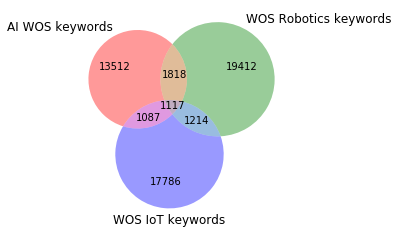

In [23]:
set1 = set(aisetwos)
set2 = set(robsetwos)
set3 = set(iotsetwos)
s = (set1,set2,set3)
v = venn3(subsets=s, set_labels = ('AI WOS keywords', 'WOS Robotics keywords', 'WOS IoT keywords'))
plt.savefig('Venn-wos-keywords-1998-2017.png')
#plt.savefig('Venn-wos-1998-2017.svg')
plt.show()

In [24]:
print("Summary for WOS Keywords")
print("Intersect between AI and Robotics:", len(set1.intersection(set2))) # AI + ROB
print("Intersect between Robotics and IoT:", len(set2.intersection(set3))) # ROB + IOT
print("Intersect between AI and IoT:",len(set1.intersection(set3))) # AI + IOT)
print("Intesect between all three:",len(set1.intersection(set3,set2))) # all three

Summary for WOS Keywords
Intersect between AI and Robotics: 2935
Intersect between Robotics and IoT: 2331
Intersect between AI and IoT: 2204
Intesect between all three: 1117


### NSF Awards

In [42]:
ainsf = pd.read_csv('Records/nsf-1990-2017-awards-artificial-intelligence.csv')
robnsf = pd.read_csv('Records/nsf-1991-2017-awards-robotics.csv')
iotnsf = pd.read_csv('Records/nsf-1998-2017-awards-internet-of-things.csv')
frames = [ainsf,robnsf,iotnsf]
allnsf = pd.concat(frames, sort=False) # all awards

#### NSF Total Awards < 1998

In [62]:
print("AI unique publications:", ainsf['AwardNumber'].nunique())
print("Robotics unique publications:",robnsf['AwardNumber'].nunique())
print("IoT unique publications:", iotnsf['AwardNumber'].nunique())
print("Total unique awards for all three terms", allnsf['AwardNumber'].nunique())
print("Total non-unique awards for all three terms", allnsf['AwardNumber'].count())

AI unique publications: 1075
Robotics unique publications: 3074
IoT unique publications: 348
Total unique awards for all three terms 4332
Total non-unique awards for all three terms 4497


#### Overlapping Awards < 1998

In [65]:
ainsf['AwardNumber'] = ainsf['AwardNumber'].astype(str)
robnsf['AwardNumber'] = robnsf['AwardNumber'].astype(str)
iotnsf['AwardNumber'] = iotnsf['AwardNumber'].astype(str)

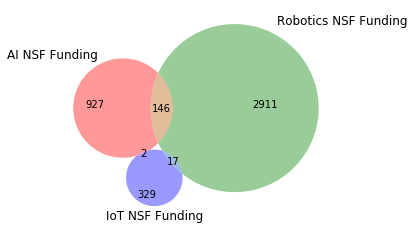

In [67]:
set1 = set(ainsf.AwardNumber)
set2 = set(robnsf.AwardNumber)
set3 = set(iotnsf.AwardNumber)
s = (set1,set2,set3)
v = venn3(subsets=s, set_labels = ('AI NSF Funding', 'Robotics NSF Funding', 'IoT NSF Funding'))
#plt.savefig('Venn-NSF-Funding-1998-2017.png')
#plt.savefig('Venn-Clarivate-1998-2017.svg')
plt.show()

In [68]:
print("Summary for NSF Awards")
print("Intersect between AI and Robotics:", len(set1.intersection(set2))) # AI + ROB
print("Intersect between Robotics and IoT:", len(set2.intersection(set3))) # ROB + IOT
print("Intersect between AI and IoT:",len(set1.intersection(set3))) # AI + IOT)
print("Intesect between all three:",len(set1.intersection(set3,set2))) # all three

Summary for NSF Awards
Intersect between AI and Robotics: 146
Intersect between Robotics and IoT: 17
Intersect between AI and IoT: 2
Intesect between all three: 0


### NSF Keywords 1998-2017

In [69]:
iotnsfkeys = pd.read_csv('iot_nsf_keywords_normalized.csv', encoding='latin1', sep=",")
robnsfkeys = pd.read_csv('robotics_nsf_keywords_normalized.csv', encoding='latin1', sep=",")
ainsfkeys = pd.read_csv('ai_nsf_keywords_normalized.csv', encoding='latin1', sep=",")

In [96]:
aikeys = ainsfkeys['Keywords'].values
robkeys = robnsfkeys['KEYWORDS'].values
iotkeys = iotnsfkeys['KEYWORDS'].values

In [73]:
aiset = set()
for i in range(len(aikeys)):
    line = aikeys[i]
    split = line.split(";")
    for x in range(len(split)):
        a = split[x]
        aiset.add(a.lower())
robset = set()
for i in range(len(robkeys)):
    line = robkeys[i]
    split = line.split(";")
    for x in range(len(split)):
        a = split[x]
        robset.add(a.lower())  
iotset = set()
for i in range(len(iotkeys)):
    line = iotkeys[i]
    split = line.split(";")
    for x in range(len(split)):
        a = split[x]
        iotset.add(a.lower())

In [121]:
allkeysnsf = set(list(aiset) + list(robset) + list(iotset))

#### Total NSF Keywords 1998-2017

In [122]:
print("AI unique keywords:", len(aiset))
print("Robotics unique keywords:", len(robset))
print("IoT unique keywords:", len(iotset))
print("Total Unique keywords:", len(allkeysnsf))

AI unique keywords: 3081
Robotics unique keywords: 6144
IoT unique keywords: 2435
Total Unique keywords: 9185


#### Overlapping NSF Keywords 1998-2017

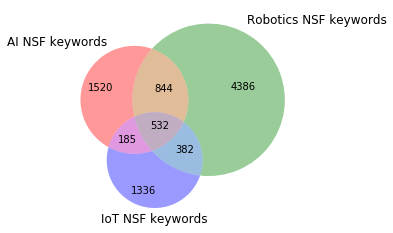

In [83]:
set1 = set(aiset)
set2 = set(robset)
set3 = set(iotset)
s = (set1,set2,set3)
v = venn3(subsets=s, set_labels = ('AI NSF keywords', 'Robotics NSF keywords', 'IoT NSF keywords'))
plt.savefig('Venn-NSF-keywords-1998-2017.png')
#plt.savefig('Venn-NSF-1998-2017.svg')
plt.show()

In [84]:
print("Summary for NSF Keywords")
print("Intersect between AI and Robotics:", len(set1.intersection(set2))) # AI + ROB
print("Intersect between Robotics and IoT:", len(set2.intersection(set3))) # ROB + IOT
print("Intersect between AI and IoT:",len(set1.intersection(set3))) # AI + IOT)
print("Intesect between all three:",len(set1.intersection(set3,set2))) # all three

Summary for NSF Keywords
Intersect between AI and Robotics: 1376
Intersect between Robotics and IoT: 914
Intersect between AI and IoT: 717
Intesect between all three: 532


In [40]:
robnsf.AwardedAmountToDate.head()

0      312000.0
1    15729208.0
2      311171.0
3      287335.0
4      340550.0
Name: AwardedAmountToDate, dtype: float64

## NSF Funding

In [43]:
fundsai = ainsf.groupby('AwardNumber'). agg(
    {
       'AwardedAmountToDate': 'sum'
    }
)
fundsrob = robnsf.groupby('AwardNumber'). agg(
    {
       'AwardedAmountToDate': 'sum'
    }
)
fundsiot = iotnsf.groupby('AwardNumber'). agg(
    {
       'AwardedAmountToDate': 'sum'
    }
)
print('AI Funding Amount: ',fundsai.AwardedAmountToDate.sum())
print('Robotics Funding Amount: ',fundsrob.AwardedAmountToDate.sum())
print('IoT Funding Amount: ',fundsiot.AwardedAmountToDate.sum())
#funds.AwardedAmountToDate.apply(lambda x: float(x.replace(',', ''))).sum()

AI Funding Amount:  494310951.0
Robotics Funding Amount:  1375299908.0
IoT Funding Amount:  149498845.0


## Create Annual Counts

Combine and export all wos data aggregated by year

In [98]:
# Merge all
df = pd.concat([ai,iot,rob], ignore_index=True, join="inner")

In [100]:
df = df.drop_duplicates(subset='ISI_LOC') # remove overallipng terms

In [102]:
year = df.groupby(['YEAR']).size().reset_index(name='count')

In [103]:
year.to_csv('wos-all-merged-year-counts.csv', sep = ',',index=False)

Combine and export all nsf data aggregated by year

In [107]:
ainsf['StartDate']= pd.to_datetime(ainsf.StartDate)
robnsf['StartDate']= pd.to_datetime(robnsf.StartDate)
iotnsf['StartDate']= pd.to_datetime(iotnsf.StartDate)
ainsf['year'] = ainsf['StartDate'].dt.strftime('%Y')
robnsf['year'] = robnsf['StartDate'].dt.strftime('%Y')
iotnsf['year'] = iotnsf['StartDate'].dt.strftime('%Y')
# Merge all
df = pd.concat([ainsf,iotnsf,robnsf], ignore_index=True, join="inner")
df = df.drop_duplicates(subset='AwardNumber')
allnsf = pd.Series(df.groupby('year')['AwardNumber'].nunique())

In [118]:
allnsf.to_csv('nsf-all-merged-year-counts.csv', sep = ',',index=True)

Combine and export all wos keywords data aggregated by year

Use files from Openrefine pre-processing steps (see documentation on how the sum of keywords was calculated per each record)

NSF

In [141]:
ainsfk = pd.read_csv('keywords/ai_nsf_keywords_normalized_with_counts.csv', encoding='latin1', sep=",")
robnsfk = pd.read_csv('keywords/robotics_nsf_keywords_normalized_with_counts.csv', encoding='latin1', sep=",")
iotnsfk = pd.read_csv('keywords/iot_nsf_keywords_normalized_with_counts.csv', encoding='latin1', sep=",")
allkeys = pd.concat([ainsfk,iotnsfk,robnsfk], ignore_index=True, join="inner")

In [143]:
alldatansf = pd.Series(allkeys.groupby('Year')['Counts'].sum())
ai_yeark = pd.Series(ainsfk.groupby('Year')['Counts'].sum())
rob_yeark = pd.Series(robnsfk.groupby('Year')['Counts'].sum())
iot_yeark = pd.Series(iotnsfk.groupby('Year')['Counts'].sum())

In [146]:
ai_yeark.to_csv('nsf-ai-year-keywords-counts.csv', sep = ',',index=True)
rob_yeark.to_csv('nsf-rob-year-keywords-counts.csv', sep = ',',index=True)
iot_yeark.to_csv('nsf-iot-year-keywords-counts.csv', sep = ',',index=True)
alldatansf.to_csv('nsf-all-year-keywords-counts.csv', sep = ',',index=True)

WOS

In [150]:
aiwosk = pd.read_csv('keywords/ai_wos_keywords_normalized_with_counts.csv', encoding='latin1', sep=",")
robwosk = pd.read_csv('keywords/robotics_wos_keywords_normalized_with_counts.csv', encoding='latin1', sep=",")
iotwosk = pd.read_csv('keywords/iot_wos_keywords_normalized_with_counts.csv', encoding='latin1', sep=",")
allkeyswos = pd.concat([aiwosk,iotwosk,robwosk], ignore_index=True, join="inner")

In [151]:
alldatawos = pd.Series(allkeyswos.groupby('Year')['Counts'].sum())
ai_yearw = pd.Series(aiwosk.groupby('Year')['Counts'].sum())
rob_yearw = pd.Series(robwosk.groupby('Year')['Counts'].sum())
iot_yearw = pd.Series(iotwosk.groupby('Year')['Counts'].sum())

In [152]:
ai_yearw.to_csv('wos-ai-year-keywords-counts.csv', sep = ',',index=True)
rob_yearw.to_csv('wos-rob-year-keywords-counts.csv', sep = ',',index=True)
iot_yearw.to_csv('wos-iot-year-keywords-counts.csv', sep = ',',index=True)
alldatawos.to_csv('wos-all-year-keywords-counts.csv', sep = ',',index=True)

In [105]:
alldata = pd.Series(df.groupby('YEAR')['ISI_LOC'].nunique())

In [135]:
from scipy import stats
a = int(alldata.index.values)
b = np.log(alldata.values)
t2, p2 = stats.ttest_ind(a,b)
print("t = " + str(t2))
print("p = " + str(p2))

t = 1496.2850351585107
p = 2.9812510178305865e-92


In [147]:

a = x
b = np.log(allnsf.values)
t2, p2 = stats.ttest_ind(a,b)
print("t = " + str(t2))
print("p = " + str(p2))

t = 1267.0371714471155
p = 1.8086377274669222e-122
